# Precipitation Prediction using ML

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/AdvaithKrishnaA/Advaith/master/precipitation.csv?token=ASJU7FOKDGZL7BM4MW6VZ4TB2RHO6')

In [3]:
data.head(10)

,STATION,NAME,DATE,AWND,PGTM,PRCP,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT08
0,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-01,2.46,NaN,0.00,NaN,64,43,10.0,30.0,8.1,11.0,NaN,NaN,1.0
1,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-02,2.01,NaN,0.00,NaN,65,47,270.0,30.0,6.0,8.9,NaN,NaN,NaN
2,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-03,0.67,NaN,0.00,NaN,62,44,150.0,150.0,10.1,14.1,NaN,NaN,NaN
3,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-04,1.34,NaN,0.01,NaN,69,55,270.0,280.0,8.1,14.1,NaN,NaN,NaN
4,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-05,2.46,NaN,1.61,NaN,59,49,140.0,140.0,10.1,16.1,1.0,1.0,NaN
5,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-06,2.91,NaN,0.80,NaN,58,46,80.0,290.0,12.1,17.0,1.0,NaN,NaN
6,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-07,1.79,NaN,0.30,NaN,59,45,20.0,10.0,10.1,18.1,1.0,NaN,NaN
7,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-08,2.24,NaN,0.00,NaN,62,44,280.0,340.0,8.1,16.1,NaN,NaN,NaN
8,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-09,1.12,NaN,0.00,NaN,60,46,90.0,100.0,6.0,10.1,NaN,NaN,NaN
9,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-10,1.12,NaN,0.00,NaN,62,51,270.0,270.0,6.9,10.1,NaN,NaN,NaN


In [4]:
data.describe(include='all')

,STATION,NAME,DATE,AWND,PGTM,PRCP,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT08
count,1827,1827,1827,1823.000000,62.000000,1827.000000,0.0,1827.000000,1827.000000,1822.000000,1809.000000,1823.000000,1809.000000,551.0,39.0,861.0
unique,1,1,1827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1827,1827,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.675710,1404.854839,0.035720,NaN,76.498632,58.120416,254.143798,256.428966,9.062095,14.721669,1.0,1.0,1.0
std,NaN,NaN,NaN,0.909434,350.813754,0.189859,NaN,9.133929,7.223756,54.756284,55.571902,2.016827,3.622257,0.0,0.0,0.0
min,NaN,NaN,NaN,0.000000,103.000000,0.000000,NaN,52.000000,38.000000,10.000000,10.000000,2.900000,6.000000,1.0,1.0,1.0
25%,NaN,NaN,NaN,1.120000,1337.500000,0.000000,NaN,70.000000,53.000000,260.000000,270.000000,8.100000,12.100000,1.0,1.0,1.0
50%,NaN,NaN,NaN,1.570000,1442.500000,0.000000,NaN,76.000000,58.000000,270.000000,270.000000,8.900000,14.100000,1.0,1.0,1.0
75%,NaN,NaN,NaN,2.010000,1545.000000,0.000000,NaN,83.000000,64.000000,270.000000,280.000000,10.100000,16.100000,1.0,1.0,1.0


In [5]:
data.dtypes

STATION     object
NAME        object
DATE        object
AWND       float64
PGTM       float64
PRCP       float64
TAVG       float64
TMAX         int64
TMIN         int64
WDF2       float64
WDF5       float64
WSF2       float64
WSF5       float64
WT01       float64
WT02       float64
WT08       float64
dtype: object

In [6]:
#Replacing all non zero values in PRCP column with 1
data['PRCP']=data['PRCP'].astype(bool).astype(int)
data.head(5)

,STATION,NAME,DATE,AWND,PGTM,PRCP,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT08
0,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-01,2.46,NaN,0,NaN,64,43,10.0,30.0,8.1,11.0,NaN,NaN,1.0
1,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-02,2.01,NaN,0,NaN,65,47,270.0,30.0,6.0,8.9,NaN,NaN,NaN
2,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-03,0.67,NaN,0,NaN,62,44,150.0,150.0,10.1,14.1,NaN,NaN,NaN
3,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-04,1.34,NaN,1,NaN,69,55,270.0,280.0,8.1,14.1,NaN,NaN,NaN
4,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-05,2.46,NaN,1,NaN,59,49,140.0,140.0,10.1,16.1,1.0,1.0,NaN


Text(0.5, 0, 'Precipitation')

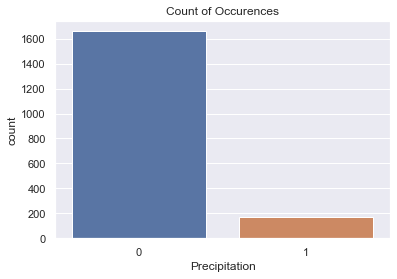

In [7]:
sns.set_theme(style="darkgrid")
ax=sns.countplot(x="PRCP", data=data)
ax.set_title("Count of Occurences")
ax.set_xlabel("Precipitation")

Text(0.5, 0, 'Precipitation')

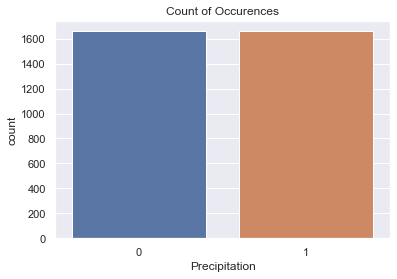

In [8]:
#resampling the data by upsampling the minority class
data_min=data[data['PRCP']==1]
data_maj=data[data['PRCP']==0]
from sklearn.utils import resample
data_min_upsampled=resample(data_min,replace=True,n_samples=len(data_maj),random_state=0)
data_upsampled=pd.concat([data_maj,data_min_upsampled])
data=data_upsampled
axf=sns.countplot(x="PRCP", data=data)
axf.set_title("Count of Occurences")
axf.set_xlabel("Precipitation")

In [9]:
data.isnull().sum()

STATION       0
NAME          0
DATE          0
AWND          4
PGTM       3231
PRCP          0
TAVG       3320
TMAX          0
TMIN          0
WDF2          5
WDF5         39
WSF2          4
WSF5         39
WT01       1586
WT02       3263
WT08       1998
dtype: int64

In [10]:
#dropping features with too many null values
data.drop(['PGTM','TAVG','WT01','WT02','WT08'],axis=1,inplace=True)
cols_mode=['AWND','WDF2','WDF5','WSF2','WSF5']
#replacing missing values with mode
for i in cols_mode:
    data[i]=data[i].fillna(data[i].mode()[0])
#removing unneccesary columns
data.drop(['STATION','NAME'],axis=1,inplace=True)
#retrieving the month from the date column
data['DATE'] = pd.DatetimeIndex(data['DATE']).month
data.head(5)

,DATE,AWND,PRCP,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5
0,1,2.46,0,64,43,10.0,30.0,8.1,11.0
1,1,2.01,0,65,47,270.0,30.0,6.0,8.9
2,1,0.67,0,62,44,150.0,150.0,10.1,14.1
7,1,2.24,0,62,44,280.0,340.0,8.1,16.1
8,1,1.12,0,60,46,90.0,100.0,6.0,10.1


<AxesSubplot:>

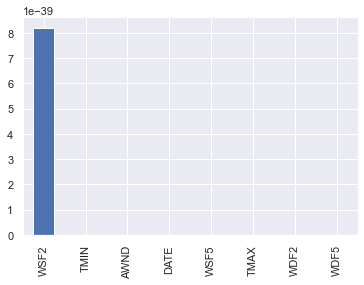

In [11]:
X=data.drop(['PRCP'],axis=1)
y=data['PRCP']
#chi-square test
from sklearn.feature_selection import SelectKBest, chi2
chi_scores = chi2(X,y)
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()

In [12]:
#Using SelectKBest to get top 7 features
X_new = SelectKBest(chi2, k=7).fit_transform(X, y)
X = pd.DataFrame(X_new, columns = ['DATE', 'AWND', 'TMAX', 'TMIN', 'WDF2', 'WDF5', 'WSF5'])
X.head(5)

,DATE,AWND,TMAX,TMIN,WDF2,WDF5,WSF5
0,1.0,2.46,64.0,43.0,10.0,30.0,11.0
1,1.0,2.01,65.0,47.0,270.0,30.0,8.9
2,1.0,0.67,62.0,44.0,150.0,150.0,14.1
3,1.0,2.24,62.0,44.0,280.0,340.0,16.1
4,1.0,1.12,60.0,46.0,90.0,100.0,10.1


In [13]:
#train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=60)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
clf1 = LogisticRegression(max_iter=1000, random_state=123)
clf2 = RandomForestClassifier(n_estimators=100, random_state=123)
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, clf1.predict(X_test)))
print(classification_report(y_test, clf2.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       315
           1       0.87      0.89      0.88       349

    accuracy                           0.87       664
   macro avg       0.87      0.87      0.87       664
weighted avg       0.87      0.87      0.87       664

              precision    recall  f1-score   support

           0       1.00      0.95      0.98       315
           1       0.96      1.00      0.98       349

    accuracy                           0.98       664
   macro avg       0.98      0.98      0.98       664
weighted avg       0.98      0.98      0.98       664



In [15]:
#roc-auc
from sklearn.metrics import roc_auc_score
s1=roc_auc_score(y_test, clf1.predict(X_test))
s2=roc_auc_score(y_test, clf2.predict(X_test))
print('AUC for Logistic Regression Classifier: %.3f' %s1)
print('AUC for Random Forest Classifier: %.3f' %s2)

AUC for Logistic Regression Classifier: 0.870
AUC for Random Forest Classifier: 0.976


Confusion Matrix for Logistic Regression Classifier: 
 [[269  46]
 [ 40 309]]


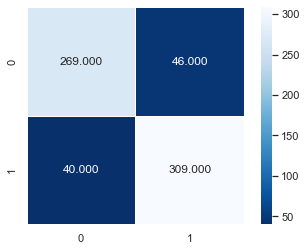

In [16]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, clf1.predict(X_test))
print('Confusion Matrix for Logistic Regression Classifier: \n', cm1)
sns.heatmap(cm1, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');

Confusion Matrix for Random Forest Classifier: 
 [[300  15]
 [  0 349]]


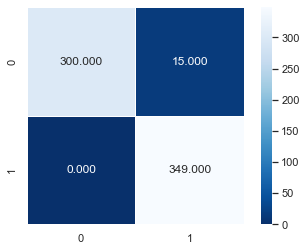

In [17]:
cm2 = confusion_matrix(y_test, clf2.predict(X_test))
print('Confusion Matrix for Random Forest Classifier: \n', cm2)
sns.heatmap(cm2, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');